Export DVH from Eclipse as text files, load in the data to pandas objects and analyse

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls

Case1_AAA.txt*
DVH.csv
Metrics.csv
Parse Eclipse DVH text file v1 24-11-2016.ipynb


In [3]:
# Read in file into a list
with open('Case1_AAA.txt', "r") as file:
    my_file = [line for line in file.readlines()]
file.close()

file_len = len(my_file)
print('number of lines in file is : ' + str(file_len))

patID = my_file[1].split(':')[-1].strip('\n').strip()
print('The patient ID is : ' + patID)

prescription = my_file[13].split(':')[-1].strip('\n').strip()
print('The prescribed dose is : ' + prescription + ' Gy')

number of lines in file is : 44749
The patient ID is : Case1_AAA
The prescribed dose is : 65.000 Gy


# Load Eclipse metrics to dataframe

In [4]:
# get the file index and name each structure for later 
structures_indexs_list = []
structures_names_list  = []
for i, line in enumerate(my_file):
    if line.startswith('Structure:'):
        structures_indexs_list.append(i)  
        structures_names_list.append(line.split(':')[-1].strip('\n').strip())

In [5]:
# iterate through all structures and place metrics into dataframe
for i, index in enumerate(structures_indexs_list):
    metric_list = []
    value_list = []   
        
    for line in my_file[index:index+13]:  
        metric_list.append(line.split(':')[0])
        value_list.append(line.split(':')[-1:][0].strip('\n').strip())
    
    df_metrics_temp = pd.DataFrame({'Metric' : metric_list, structures_names_list[i]: value_list})
        
    if i == 0: 
        eclipse_metrics_df = df_metrics_temp          
    else:           
        eclipse_metrics_df = pd.merge(left = eclipse_metrics_df, right=df_metrics_temp, how='inner', on=['Metric'])
eclipse_metrics_df.set_index(keys='Metric', inplace=True)

In [6]:
eclipse_metrics_df.head()

,Pseudo Other_P,Pseudo Oral Cav_,Pseudo Midline_P,PTV2 edit_P,PTV2_P,PTV1 edit_P,PTV1_P,Lt Par edit_P,Body_P,Annulus High_P,...,SC + 3mm_P,SC + 5mm_P,Pseudo PTV1_P,Pseudo PTV2_P,Artifact Dental_,ArtifactContrast,Dose 6175[cGy]_P,Dose 5130[cGy]_P,PseudoPostBrain_,Dummy_P
Metric,,,,,,,,,,,,,,,,,,,,,
Structure,Pseudo Other_P,Pseudo Oral Cav_,Pseudo Midline_P,PTV2 edit_P,PTV2_P,PTV1 edit_P,PTV1_P,Lt Par edit_P,Body_P,Annulus High_P,...,SC + 3mm_P,SC + 5mm_P,Pseudo PTV1_P,Pseudo PTV2_P,Artifact Dental_,ArtifactContrast,Dose 6175[cGy]_P,Dose 5130[cGy]_P,PseudoPostBrain_,Dummy_P
Approval Status,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,...,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved
Plan,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,...,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA
Course,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Volume [cm³],22.1,115.4,89.7,207.4,228.5,469.0,504.8,14.6,12173.4,711.0,...,58.0,86.5,521.6,206.7,52.2,51.5,505.7,1071.2,135.7,1.5


Get only metrics of interest

In [7]:
metrics_of_interest = [ 'Mean Dose [%]',
                        'Median Dose [%]',
                        'Max Dose [%]',
                        'Min Dose [%]',
                        'Volume [cm³]']

In [8]:
eclipse_metrics_df.to_csv('Metrics.csv')  # Save

## Load single DVH to dataframe

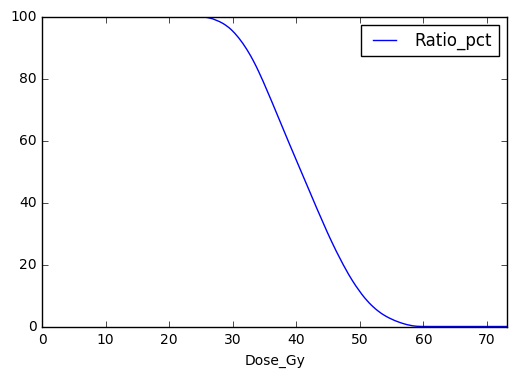

In [9]:
index = 1
start = structures_indexs_list[index]+18  # first line of DVH data
end =   structures_indexs_list[index+1]-2
DVH_data_1 = my_file[start:end]  # get list with data

DVH_list = [line.split() for line in DVH_data_1]  # create list of lists split
Rel_dose_pct, Dose_Gy, Ratio_pct = zip(*DVH_list) # unzip to 3 lists

pd1 = pd.DataFrame({'Dose_Gy' : Dose_Gy, 'Ratio_pct' : Ratio_pct}).astype(float) 
pd1.plot('Dose_Gy', 'Ratio_pct') # , kind='scatter'

## Load ALL DVH to dataframe

In [10]:
# iterate through all structures and place metrics into dataframe
for i, index in enumerate(structures_indexs_list):   
    start = structures_indexs_list[i]+18  # first line of DVH data
    
    if i < len(structures_indexs_list)-1:
        end =   structures_indexs_list[i+1]-2  # find the last line of the DVH from the next index, BEWARE THE +1
    else:
        end = len(my_file)-2

    DVH_data = my_file[start:end]  # get list with data
    DVH_list = [line.split() for line in DVH_data]  # create list of lists split
    Rel_dose_pct, Dose_Gy, Ratio_pct = zip(*DVH_list) # unzip to 3 lists
    
    df_temp = pd.DataFrame({'Dose_Gy' : Dose_Gy, structures_names_list[i]: Ratio_pct}).astype(float) 
    
    if i== 0:
        DVH_df = df_temp
    else:
        DVH_df = pd.merge(DVH_df, df_temp, on=['Dose_Gy'])
        
DVH_df.set_index(keys='Dose_Gy', drop=True, inplace=True)

In [11]:
DVH_df.head()

,Pseudo Other_P,Pseudo Oral Cav_,Pseudo Midline_P,PTV2 edit_P,PTV2_P,PTV1 edit_P,PTV1_P,Lt Par edit_P,Body_P,Annulus High_P,...,SC + 3mm_P,SC + 5mm_P,Pseudo PTV1_P,Pseudo PTV2_P,Artifact Dental_,ArtifactContrast,Dose 6175[cGy]_P,Dose 5130[cGy]_P,PseudoPostBrain_,Dummy_P
Dose_Gy,,,,,,,,,,,,,,,,,,,,,
0.000,100.0,100.0,100.0,100.0,100.0,100.0,100.0000,100.0,100.0000,100.0000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.065,100.0,100.0,100.0,100.0,100.0,100.0,99.9897,100.0,99.9999,90.7705,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.130,100.0,100.0,100.0,100.0,100.0,100.0,99.9876,100.0,99.8369,90.5132,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.195,100.0,100.0,100.0,100.0,100.0,100.0,99.9856,100.0,99.2374,90.3296,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.260,100.0,100.0,100.0,100.0,100.0,100.0,99.9836,100.0,98.5017,90.1857,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [12]:
DVH_df.to_csv('DVH.csv')  # Save

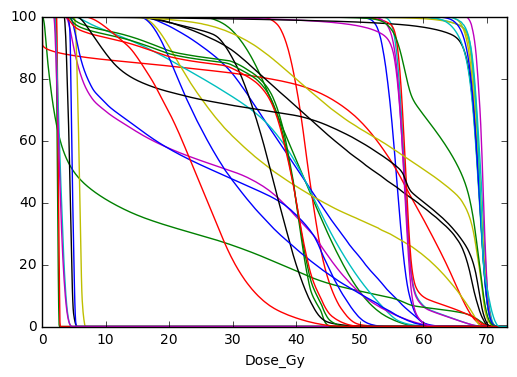

In [13]:
DVH_df.plot(legend=False)  # many legends so dont plot

In [14]:
cols = list(DVH_df.columns.values)
structures_to_plot = cols[1:7]  # get short list of structures

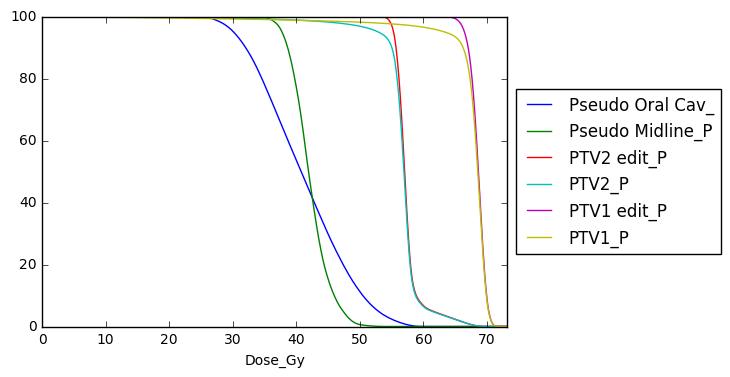

In [15]:
DVH_df[structures_to_plot].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5)); 

In [16]:
DVH_df['PTV1_P'].min(skipna=True)

9.3206000000000002e-05

In [17]:
eclipse_metrics_df['PTV1_P']  # Eclipses data

Metric
Structure                 PTV1_P
Approval Status       Unapproved
Plan                   Case1_AAA
Course                         1
Volume [cm³]               504.8
Dose Cover.[%]             100.0
Sampling Cover.[%]         100.0
Min Dose [%]                 0.0
Max Dose [%]               112.8
Mean Dose [%]              103.8
Modal Dose [%]             105.7
Median Dose [%]            105.5
STD [%]                      9.0
Name: PTV1_P, dtype: object

### To do - understand how metrics are calculated in Eclipse..

# Wrap functionality up in a class

Will create 2 dataframes, 1 with metrics as calc'd by Eclipse, 1 for the raw DVH data from which metrics can be calc'd (TO DO)

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Case1_AAA = eclipse_DVH('Case1_AAA.txt')

class eclipse_DVH(object): 
    def __init__(self, file):  # file = 'Case1_AAA.txt'  string
        with open(file, "r") as file_:
            my_file = [line for line in file_.readlines()]  # my_file is a list representation of the text file
        file_.close()        
        self.file_len = len(my_file)                                # number of lines in the file
        self.patID = my_file[1].split(':')[-1].strip('\n').strip()
        self.prescription = my_file[13].split(':')[-1].strip('\n').strip()
        print(file + ' loaded \t patID = ' + self.patID + '\t Prescription [Gy] = ' + self.prescription)
        
        ## Get the structures
        self.structures_indexs_list = []
        self.structures_names_list  = []
        for i, line in enumerate(my_file):
            if line.startswith('Structure:'):
                self.structures_indexs_list.append(i)  
                self.structures_names_list.append(line.split(':')[-1].strip('\n').strip())
        
        # iterate through all structures and place Eclipse metrics into dataframe
        for i, index in enumerate(self.structures_indexs_list):
            # Metrics first
            metric_list = []
            value_list = []   
        
            for line in my_file[index:index+13]:     # get 'header' of each structure
                metric_list.append(line.split(':')[0])
                value_list.append(line.split(':')[-1:][0].strip('\n').strip())    
            
            # Now DVH
            start = self.structures_indexs_list[i]+18  # first line of DVH data
            if i < len(self.structures_indexs_list)-1:
                end = self.structures_indexs_list[i+1]-2  # find the last line of the DVH from the next index, BEWARE THE +1
            else:
                end = len(my_file)-2
            DVH_data = my_file[start:end]  # get list with data
            
            DVH_list = [line.split() for line in DVH_data]  # create list of lists split
            Rel_dose_pct, Dose_Gy, Ratio_pct = zip(*DVH_list) # unzip to 3 lists
            
            # Populate temp dataframes
            temp_metric_df = pd.DataFrame({'Metric' : metric_list, self.structures_names_list[i]: value_list})
            temp_DVH_df    = pd.DataFrame({'Dose_Gy' : Dose_Gy, self.structures_names_list[i]: Ratio_pct}).astype(float)
            if i == 0: 
                self.metrics_df = temp_metric_df 
                self.DVH_df = temp_DVH_df
            else:                          
                self.metrics_df = pd.merge(left = self.metrics_df, right=temp_metric_df, how='inner', on=['Metric'])
                self.DVH_df = pd.merge(self.DVH_df, temp_DVH_df, on=['Dose_Gy'])
        
        # Tidy up
        self.DVH_df.set_index(keys='Dose_Gy', drop=True, inplace=True)            
        self.metrics_df.set_index(keys='Metric', inplace=True)  # write to self

Works so save this to pyEclipseDVH.py

### Now test class

In [4]:
Case1_AAA = eclipse_DVH('Case1_AAA.txt')

Case1_AAA.txt loaded 	 patID = Case1_AAA	 Prescription [Gy] = 65.000


In [5]:
Case1_AAA.DVH_df.head()

,Pseudo Other_P,Pseudo Oral Cav_,Pseudo Midline_P,PTV2 edit_P,PTV2_P,PTV1 edit_P,PTV1_P,Lt Par edit_P,Body_P,Annulus High_P,...,SC + 3mm_P,SC + 5mm_P,Pseudo PTV1_P,Pseudo PTV2_P,Artifact Dental_,ArtifactContrast,Dose 6175[cGy]_P,Dose 5130[cGy]_P,PseudoPostBrain_,Dummy_P
Dose_Gy,,,,,,,,,,,,,,,,,,,,,
0.000,100.0,100.0,100.0,100.0,100.0,100.0,100.0000,100.0,100.0000,100.0000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.065,100.0,100.0,100.0,100.0,100.0,100.0,99.9897,100.0,99.9999,90.7705,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.130,100.0,100.0,100.0,100.0,100.0,100.0,99.9876,100.0,99.8369,90.5132,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.195,100.0,100.0,100.0,100.0,100.0,100.0,99.9856,100.0,99.2374,90.3296,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.260,100.0,100.0,100.0,100.0,100.0,100.0,99.9836,100.0,98.5017,90.1857,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


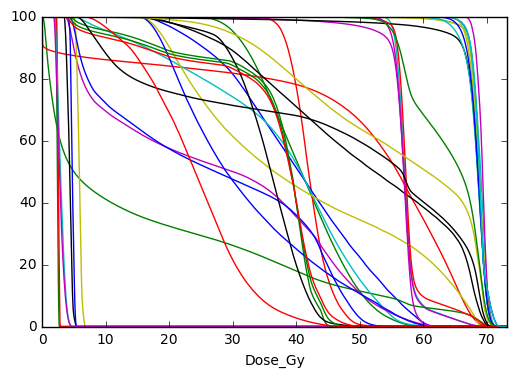

In [37]:
Case1_AAA.DVH_df.plot(legend=False)

In [38]:
Case1_AAA.metrics_df.head()

,Pseudo Other_P,Pseudo Oral Cav_,Pseudo Midline_P,PTV2 edit_P,PTV2_P,PTV1 edit_P,PTV1_P,Lt Par edit_P,Body_P,Annulus High_P,...,SC + 3mm_P,SC + 5mm_P,Pseudo PTV1_P,Pseudo PTV2_P,Artifact Dental_,ArtifactContrast,Dose 6175[cGy]_P,Dose 5130[cGy]_P,PseudoPostBrain_,Dummy_P
Metric,,,,,,,,,,,,,,,,,,,,,
Structure,Pseudo Other_P,Pseudo Oral Cav_,Pseudo Midline_P,PTV2 edit_P,PTV2_P,PTV1 edit_P,PTV1_P,Lt Par edit_P,Body_P,Annulus High_P,...,SC + 3mm_P,SC + 5mm_P,Pseudo PTV1_P,Pseudo PTV2_P,Artifact Dental_,ArtifactContrast,Dose 6175[cGy]_P,Dose 5130[cGy]_P,PseudoPostBrain_,Dummy_P
Approval Status,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,...,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved,Unapproved
Plan,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,...,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA,Case1_AAA
Course,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Volume [cm³],22.1,115.4,89.7,207.4,228.5,469.0,504.8,14.6,12173.4,711.0,...,58.0,86.5,521.6,206.7,52.2,51.5,505.7,1071.2,135.7,1.5


In [39]:
Case1_AAA.metrics_df['PTV1_P']

Metric
Structure                 PTV1_P
Approval Status       Unapproved
Plan                   Case1_AAA
Course                         1
Volume [cm³]               504.8
Dose Cover.[%]             100.0
Sampling Cover.[%]         100.0
Min Dose [%]                 0.0
Max Dose [%]               112.8
Mean Dose [%]              103.8
Modal Dose [%]             105.7
Median Dose [%]            105.5
STD [%]                      9.0
Name: PTV1_P, dtype: object